In [0]:
paths = [
    "/mnt/raw",
    "/mnt/raw/bronze",
    "/mnt/raw/bronze/demand",
    "/mnt/raw/bronze/external",
    "/mnt/raw/bronze/feateng",
    "/mnt/raw/silver/master",
    "/mnt/raw/gold",
    "/mnt/raw/gold/demand_forecasting_final"
]

for p in paths:
    try:
        print(f"📂 Checking: {p}")
        print(dbutils.fs.ls(p))
    except Exception as e:
        print(f"❌ Cannot access: {p}")
        print(e)
    print("----------------------------------------------------")


📂 Checking: /mnt/raw
[FileInfo(path='dbfs:/mnt/raw/bronze/', name='bronze/', size=0, modificationTime=1763725478000), FileInfo(path='dbfs:/mnt/raw/demand_data/', name='demand_data/', size=0, modificationTime=1763708940000), FileInfo(path='dbfs:/mnt/raw/external_factors/', name='external_factors/', size=0, modificationTime=1763715906000), FileInfo(path='dbfs:/mnt/raw/feature_engineering/', name='feature_engineering/', size=0, modificationTime=1763708878000), FileInfo(path='dbfs:/mnt/raw/gold/', name='gold/', size=0, modificationTime=1763734857000), FileInfo(path='dbfs:/mnt/raw/powerbi_forecasts/', name='powerbi_forecasts/', size=0, modificationTime=1763829395000), FileInfo(path='dbfs:/mnt/raw/silver/', name='silver/', size=0, modificationTime=1763734303000)]
----------------------------------------------------
📂 Checking: /mnt/raw/bronze
[FileInfo(path='dbfs:/mnt/raw/bronze/demand/', name='demand/', size=0, modificationTime=1763724095000), FileInfo(path='dbfs:/mnt/raw/bronze/external/',

In [0]:
silver_path = "/mnt/raw/silver/master"
df_silver = spark.read.format("delta").load(silver_path)

df_silver.printSchema()
display(df_silver.limit(10))


root
 |-- Date: date (nullable = true)
 |-- Region: string (nullable = true)
 |-- Service: string (nullable = true)
 |-- Daily_Usage_Units: double (nullable = true)
 |-- Peak_Usage_Units: integer (nullable = true)
 |-- VM_Count: integer (nullable = true)
 |-- Storage_TB: integer (nullable = true)
 |-- Season: string (nullable = true)
 |-- Econ_Index: integer (nullable = true)
 |-- Downtime_Min: integer (nullable = true)
 |-- Cloud_Demand_Index: integer (nullable = true)
 |-- GDP_Growth: double (nullable = true)
 |-- Inflation: double (nullable = true)
 |-- Competitor_Price_Index: integer (nullable = true)
 |-- Usage_Lag_1: integer (nullable = true)
 |-- Usage_Lag_7: integer (nullable = true)
 |-- Week_Over_Week_Growth: double (nullable = true)
 |-- Seasonality_Factor: double (nullable = true)



Date,Region,Service,Daily_Usage_Units,Peak_Usage_Units,VM_Count,Storage_TB,Season,Econ_Index,Downtime_Min,Cloud_Demand_Index,GDP_Growth,Inflation,Competitor_Price_Index,Usage_Lag_1,Usage_Lag_7,Week_Over_Week_Growth,Seasonality_Factor
2020-01-03,WEST EUROPE,COMPUTE,80231.0,88221,8478,0,Winter,96,3,89,2.910710224528352,5.363531613888448,93,119622,0,0.0,1.1941372778403934
2020-05-06,CENTRAL INDIA,COMPUTE,152801.0,178906,7130,0,Spring,94,3,119,5.074715838791222,5.187429055730949,100,178140,159784,-4.370274871075953,1.071231507866667
2020-07-01,EAST US,COMPUTE,71921.0,81785,10472,0,Summer,107,3,82,5.370439236321397,5.209181283430252,123,77560,167720,-57.11841163844503,1.1551871985050821
2020-07-13,EAST US,COMPUTE,104660.0,123053,11518,0,Summer,91,0,81,5.503432483122108,6.665496819362889,126,76343,125647,-16.703144523944065,1.1132691804913937
2020-08-12,CENTRAL INDIA,COMPUTE,73721.0,91507,14398,0,Summer,99,1,66,4.674224066499404,5.769263896822682,127,175947,73124,0.8164214211476397,1.1981467620302828
2020-10-11,WEST EUROPE,STORAGE,0.0,0,0,647,Autumn,81,0,93,4.190859667788166,4.770330971779169,112,0,0,0.0,1.1132897652695177
2020-10-23,EAST US,COMPUTE,120747.0,144550,3002,0,Autumn,99,0,107,5.11375325981645,4.248749307460542,91,151683,50445,139.36366339577756,1.1892668914935995
2020-11-06,WEST EUROPE,COMPUTE,83890.0,104425,10411,0,Autumn,86,1,119,4.830710806907196,7.4308754230563165,114,110564,90631,-7.437852390462425,1.192496216502345
2020-12-07,WEST EUROPE,COMPUTE,154081.0,182260,11277,0,Winter,108,2,75,5.89883861848111,6.764184071482227,96,144479,153874,0.13452565085719484,1.1472035677435046
2020-12-12,WEST EUROPE,STORAGE,0.0,0,0,631,Winter,103,2,87,3.0602180182312395,3.6643202348234736,95,0,0,0.0,1.0916857030430658


In [0]:
silver_path = "/mnt/raw/silver/master"
df = spark.read.format("delta").load(silver_path)


In [0]:
from pyspark.sql.functions import col

df = (
    df.withColumnRenamed("Date", "date")
      .withColumnRenamed("Region", "region")
      .withColumnRenamed("Service", "service")
      .withColumnRenamed("Daily_Usage_Units", "daily_usage_units")
      .withColumnRenamed("Peak_Usage_Units", "peak_usage_units")
      .withColumnRenamed("VM_Count", "vm_count")
      .withColumnRenamed("Storage_TB", "storage_tb")
      .withColumnRenamed("Season", "season")
      .withColumnRenamed("Econ_Index", "econ_index")
      .withColumnRenamed("Downtime_Min", "downtime_min")
      .withColumnRenamed("Cloud_Demand_Index", "cloud_demand_index")
      .withColumnRenamed("GDP_Growth", "gdp_growth")
      .withColumnRenamed("Inflation", "inflation")
      .withColumnRenamed("Competitor_Price_Index", "competitor_price_index")
      .withColumnRenamed("Usage_Lag_1", "usage_lag_1")
      .withColumnRenamed("Usage_Lag_7", "usage_lag_7")
      .withColumnRenamed("Week_Over_Week_Growth", "week_over_week_growth")
      .withColumnRenamed("Seasonality_Factor", "seasonality_factor")
)


In [0]:
gold_df = df.select(
    "date", "region", "service",
    "daily_usage_units", "peak_usage_units", "vm_count", "storage_tb",
    "season", "econ_index", "downtime_min",
    "cloud_demand_index", "gdp_growth", "inflation", "competitor_price_index",
    "usage_lag_1", "usage_lag_7",
    "week_over_week_growth", "seasonality_factor"
)


In [0]:
gold_path = "/mnt/raw/gold/demand_forecasting_final"

gold_df.write.format("delta").mode("overwrite").save(gold_path)
print("✅ GOLD table successfully created at:", gold_path)


✅ GOLD table successfully created at: /mnt/raw/gold/demand_forecasting_final


In [0]:
df_gold = spark.read.format("delta").load(gold_path)

df_gold.printSchema()
display(df_gold.limit(20))


root
 |-- date: date (nullable = true)
 |-- region: string (nullable = true)
 |-- service: string (nullable = true)
 |-- daily_usage_units: double (nullable = true)
 |-- peak_usage_units: integer (nullable = true)
 |-- vm_count: integer (nullable = true)
 |-- storage_tb: integer (nullable = true)
 |-- season: string (nullable = true)
 |-- econ_index: integer (nullable = true)
 |-- downtime_min: integer (nullable = true)
 |-- cloud_demand_index: integer (nullable = true)
 |-- gdp_growth: double (nullable = true)
 |-- inflation: double (nullable = true)
 |-- competitor_price_index: integer (nullable = true)
 |-- usage_lag_1: integer (nullable = true)
 |-- usage_lag_7: integer (nullable = true)
 |-- week_over_week_growth: double (nullable = true)
 |-- seasonality_factor: double (nullable = true)



date,region,service,daily_usage_units,peak_usage_units,vm_count,storage_tb,season,econ_index,downtime_min,cloud_demand_index,gdp_growth,inflation,competitor_price_index,usage_lag_1,usage_lag_7,week_over_week_growth,seasonality_factor
2020-01-03,WEST EUROPE,COMPUTE,80231.0,88221,8478,0,Winter,96,3,89,2.910710224528352,5.363531613888448,93,119622,0,0.0,1.1941372778403934
2020-05-06,CENTRAL INDIA,COMPUTE,152801.0,178906,7130,0,Spring,94,3,119,5.074715838791222,5.187429055730949,100,178140,159784,-4.370274871075953,1.071231507866667
2020-07-01,EAST US,COMPUTE,71921.0,81785,10472,0,Summer,107,3,82,5.370439236321397,5.209181283430252,123,77560,167720,-57.11841163844503,1.1551871985050821
2020-07-13,EAST US,COMPUTE,104660.0,123053,11518,0,Summer,91,0,81,5.503432483122108,6.665496819362889,126,76343,125647,-16.703144523944065,1.1132691804913937
2020-08-12,CENTRAL INDIA,COMPUTE,73721.0,91507,14398,0,Summer,99,1,66,4.674224066499404,5.769263896822682,127,175947,73124,0.8164214211476397,1.1981467620302828
2020-10-11,WEST EUROPE,STORAGE,0.0,0,0,647,Autumn,81,0,93,4.190859667788166,4.770330971779169,112,0,0,0.0,1.1132897652695177
2020-10-23,EAST US,COMPUTE,120747.0,144550,3002,0,Autumn,99,0,107,5.11375325981645,4.248749307460542,91,151683,50445,139.36366339577756,1.1892668914935995
2020-11-06,WEST EUROPE,COMPUTE,83890.0,104425,10411,0,Autumn,86,1,119,4.830710806907196,7.4308754230563165,114,110564,90631,-7.437852390462425,1.192496216502345
2020-12-07,WEST EUROPE,COMPUTE,154081.0,182260,11277,0,Winter,108,2,75,5.89883861848111,6.764184071482227,96,144479,153874,0.13452565085719484,1.1472035677435046
2020-12-12,WEST EUROPE,STORAGE,0.0,0,0,631,Winter,103,2,87,3.0602180182312395,3.6643202348234736,95,0,0,0.0,1.0916857030430658


In [0]:
# ---------------------------
# Cell 0 — Dependencies (run once)
# ---------------------------
# Install required pip packages (Databricks: use %pip)
%pip install pmdarima prophet xgboost joblib scikit-learn statsmodels

# After install, RESTART python runtime if prompted by Databricks.
# ---------------------------


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/50.0 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 30.7/50.0 kB 2.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 856.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/57.7 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/689.1 kB ? eta -:--:--
   ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/689.1 kB 7.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 337.9/689.1 kB 5.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/12.1 MB ? eta -:--:--
   ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/12.1 MB 52.0 MB/s eta 0:00:01
   ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/12.1 MB 41.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 5.4/12.1 MB 55.0 MB/s eta 0:00:01


In [0]:
# ---------------------------
# Cell 1 — Imports & Paths
# ---------------------------
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import math
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Stats / time-series
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ML
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Spark
from pyspark.sql import functions as F
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# Your GOLD path (mounted)
GOLD_PATH = "/mnt/raw/gold/demand_forecasting_final"
FORECASTS_DIR = "/mnt/raw/gold/forecasts"

# Ensure output directories exist
dbutils.fs.mkdirs(FORECASTS_DIR)
dbutils.fs.mkdirs(f"{FORECASTS_DIR}/export_single")

print("GOLD_PATH:", GOLD_PATH)
print("FORECASTS_DIR:", FORECASTS_DIR)
# ---------------------------


GOLD_PATH: /mnt/raw/gold/demand_forecasting_final
FORECASTS_DIR: /mnt/raw/gold/forecasts


In [0]:
# ---------------------------
# Cell 2 — Load GOLD (and quick checks)
# ---------------------------
# Load gold delta
try:
    df_gold = spark.read.format("delta").load(GOLD_PATH)
except Exception as e:
    raise RuntimeError(f"Cannot read GOLD_PATH ({GOLD_PATH}): {e}")

print("Rows in GOLD:", df_gold.count())
df_gold.printSchema()
display(df_gold.limit(5))

# Lowercase-col names convenience (optional)
# We'll use lowercase names prepared earlier; ensure they exist
expected_cols = [
    "date","region","service",
    "daily_usage_units","storage_tb",
    "usage_lag_1","usage_lag_7",
    "week_over_week_growth","seasonality_factor",
    "cloud_demand_index","gdp_growth","inflation","competitor_price_index"
]

missing = [c for c in expected_cols if c not in [c.lower() for c in df_gold.columns]]
if missing:
    print("WARNING - missing expected columns (case sensitive):", missing)
else:
    print("Required columns present.")
# ---------------------------


Rows in GOLD: 10962
root
 |-- date: date (nullable = true)
 |-- region: string (nullable = true)
 |-- service: string (nullable = true)
 |-- daily_usage_units: double (nullable = true)
 |-- peak_usage_units: integer (nullable = true)
 |-- vm_count: integer (nullable = true)
 |-- storage_tb: integer (nullable = true)
 |-- season: string (nullable = true)
 |-- econ_index: integer (nullable = true)
 |-- downtime_min: integer (nullable = true)
 |-- cloud_demand_index: integer (nullable = true)
 |-- gdp_growth: double (nullable = true)
 |-- inflation: double (nullable = true)
 |-- competitor_price_index: integer (nullable = true)
 |-- usage_lag_1: integer (nullable = true)
 |-- usage_lag_7: integer (nullable = true)
 |-- week_over_week_growth: double (nullable = true)
 |-- seasonality_factor: double (nullable = true)



date,region,service,daily_usage_units,peak_usage_units,vm_count,storage_tb,season,econ_index,downtime_min,cloud_demand_index,gdp_growth,inflation,competitor_price_index,usage_lag_1,usage_lag_7,week_over_week_growth,seasonality_factor
2020-01-03,WEST EUROPE,COMPUTE,80231.0,88221,8478,0,Winter,96,3,89,2.910710224528352,5.363531613888448,93,119622,0,0.0,1.1941372778403934
2020-05-06,CENTRAL INDIA,COMPUTE,152801.0,178906,7130,0,Spring,94,3,119,5.074715838791222,5.187429055730949,100,178140,159784,-4.370274871075953,1.071231507866667
2020-07-01,EAST US,COMPUTE,71921.0,81785,10472,0,Summer,107,3,82,5.370439236321397,5.209181283430252,123,77560,167720,-57.11841163844503,1.1551871985050821
2020-07-13,EAST US,COMPUTE,104660.0,123053,11518,0,Summer,91,0,81,5.503432483122108,6.665496819362889,126,76343,125647,-16.703144523944065,1.1132691804913937
2020-08-12,CENTRAL INDIA,COMPUTE,73721.0,91507,14398,0,Summer,99,1,66,4.674224066499404,5.769263896822682,127,175947,73124,0.8164214211476397,1.1981467620302828


Required columns present.


In [0]:
# ---------------------------
# Cell 3 — Config: services & regions & horizon
# ---------------------------
# Services and regions to process
COMPUTE_REGIONS = ["East US", "West Europe", "Central India"]
STORAGE_REGIONS = COMPUTE_REGIONS.copy()

HORIZON = 30     # test window / forecast horizon (days)
RANDOM_SEED = 42

# Target names in your GOLD
TARGET_COMPUTE = "daily_usage_units"   # target for Compute
TARGET_STORAGE = "storage_tb"          # target for Storage

# Features used by RF/XGB
FEATURE_COLS = [
    "usage_lag_1", "usage_lag_7",
    "week_over_week_growth", "seasonality_factor",
    "cloud_demand_index", "gdp_growth",
    "inflation", "competitor_price_index"
]

print("Horizon:", HORIZON)
print("Feature cols:", FEATURE_COLS)
# ---------------------------


Horizon: 30
Feature cols: ['usage_lag_1', 'usage_lag_7', 'week_over_week_growth', 'seasonality_factor', 'cloud_demand_index', 'gdp_growth', 'inflation', 'competitor_price_index']


In [0]:
# ---------------------------
# Cell 4 — Helper functions
# ---------------------------
def pandas_series_from_spark(df_spark, date_col="date", value_col=None):
    """
    Returns a pandas Series (indexed by date) from a spark dataframe with date and value columns.
    """
    pdf = df_spark.select(date_col, value_col).toPandas()
    pdf[date_col] = pd.to_datetime(pdf[date_col])
    pdf = pdf.sort_values(date_col)
    pdf = pdf.set_index(date_col)
    series = pdf[value_col].astype(float)
    return series

def evaluate_metrics(y_true, y_pred):
    # align lengths and drop NaNs
    mask = (~np.isnan(y_pred)) & (~np.isnan(y_true))
    y_true = np.array(y_true)[mask]
    y_pred = np.array(y_pred)[mask]
    if len(y_true)==0:
        return {"MAPE": np.nan, "RMSE": np.nan, "R2": np.nan}
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAPE": mape, "RMSE": rmse, "R2": r2}

def save_spark_df_as_delta(pdf, path):
    """Save a pandas df as a Spark Delta table (overwrite)."""
    sdf = spark.createDataFrame(pdf)
    sdf.write.format("delta").mode("overwrite").save(path)

def save_single_csv(spark_df, path):
    # writes single CSV file under path (coalesce(1))
    spark_df.coalesce(1).write.option("header","true").mode("overwrite").csv(path)
# ---------------------------


In [0]:
# ---------------------------
# Cell 5 — Dictionaries to store results
# ---------------------------
# Store per-region data and model results
compute_data = {}
storage_data = {}

# model result containers
arima_results = {}
sarimax_results = {}
holt_results = {}
ma_results = {}
rf_results = {}
xgb_results = {}

# model comparison rows
comparison_rows = []
# ---------------------------


In [0]:
# ---------------------------
# Cell 6 — Prepare per-region series (Compute)
# ---------------------------

for region in COMPUTE_REGIONS:
    print(f"\nPreparing Compute region: {region}")
    
    sdf = (
        df_gold
        .filter(
            (F.upper(F.col("service")) == "COMPUTE") &
            (F.upper(F.col("region")) == region.upper())
        )
        .select("date", TARGET_COMPUTE, *FEATURE_COLS)
        .orderBy("date")
    )
    
    rows = sdf.count()
    print("rows:", rows)
    
    if rows < HORIZON + 10:
        print(f"  ⚠️ Not enough rows ({rows}) for region {region} — skipping.")
        continue

    full_series = pandas_series_from_spark(sdf, date_col="date", value_col=TARGET_COMPUTE)
    
    train = full_series.iloc[:-HORIZON]
    test = full_series.iloc[-HORIZON:]
    
    compute_data[region] = {
        "sdf": sdf,
        "full": full_series,
        "train": train,
        "test": test
    }
    
    print(f"  train: {len(train)}, test: {len(test)}")

print("\nCompute preparation done.")



Preparing Compute region: East US
rows: 1827
  train: 1797, test: 30

Preparing Compute region: West Europe
rows: 1827
  train: 1797, test: 30

Preparing Compute region: Central India
rows: 1827
  train: 1797, test: 30

Compute preparation done.


In [0]:
df_gold.select("service").distinct().show(20)
df_gold.select("region").distinct().show(50)


+-------+
|service|
+-------+
|STORAGE|
|COMPUTE|
+-------+

+-------------+
|       region|
+-------------+
|  WEST EUROPE|
|CENTRAL INDIA|
|      EAST US|
+-------------+



In [0]:
# ---------------------------
# Cell 7 — Prepare per-region series (Storage)
# ---------------------------
# This cell builds STORAGE time-series per region.
# Fix applied:
#   - Convert service and region to UPPERCASE for consistent filtering
#     because GOLD layer stores values in uppercase.
# ---------------------------

for region in STORAGE_REGIONS:
    print(f"\nPreparing Storage region: {region}")
    
    # Filter GOLD table for STORAGE + REGION (upper-case matching)
    sdf = (
        df_gold
        .filter(
            (F.upper(F.col("service")) == "STORAGE") &
            (F.upper(F.col("region")) == region.upper())
        )
        .select("date", TARGET_STORAGE, *FEATURE_COLS)
        .orderBy("date")
    )
    
    rows = sdf.count()
    print("rows:", rows)
    
    # Not enough data → skip
    if rows < HORIZON + 10:
        print(f"  ⚠️ Not enough rows ({rows}) for region {region} — skipping.")
        continue

    # Convert Spark → Pandas series
    full_series = pandas_series_from_spark(
        sdf, date_col="date", value_col=TARGET_STORAGE
    )

    train = full_series.iloc[:-HORIZON]
    test  = full_series.iloc[-HORIZON:]

    # Save into storage_data dictionary
    storage_data[region] = {
        "sdf": sdf,
        "full": full_series,
        "train": train,
        "test": test
    }

    print(f"  train: {len(train)}, test: {len(test)}")

print("\nStorage preparation done.")
# ---------------------------



Preparing Storage region: East US
rows: 1827
  train: 1797, test: 30

Preparing Storage region: West Europe
rows: 1827
  train: 1797, test: 30

Preparing Storage region: Central India
rows: 1827
  train: 1797, test: 30

Storage preparation done.


In [0]:
# ---------------------------
# Cell 8 — TRAIN: ARIMA (per region)
# ---------------------------
for region, d in compute_data.items():
    print(f"\nARIMA — {region}")
    y_train = d["train"]
    y_test = d["test"]
    try:
        model = pm.auto_arima(y_train, seasonal=False, suppress_warnings=True, error_action="ignore")
        forecast = pd.Series(model.predict(n_periods=len(y_test)), index=y_test.index)
        metrics = evaluate_metrics(y_test.values, forecast.values)
        arima_results[region] = {"model": model, "forecast": forecast, "metrics": metrics}
        print("  MAPE: {:.2f} RMSE: {:.2f} R2: {:.3f}".format(metrics["MAPE"], metrics["RMSE"], metrics["R2"]))
    except Exception as e:
        print("  ARIMA failed:", e)

# Repeat for Storage (if present)
for region, d in storage_data.items():
    print(f"\nARIMA Storage — {region}")
    y_train = d["train"]
    y_test = d["test"]
    try:
        model = pm.auto_arima(y_train, seasonal=False, suppress_warnings=True, error_action="ignore")
        forecast = pd.Series(model.predict(n_periods=len(y_test)), index=y_test.index)
        metrics = evaluate_metrics(y_test.values, forecast.values)
        arima_results[f"storage__{region}"] = {"model": model, "forecast": forecast, "metrics": metrics}
        print("  MAPE: {:.2f} RMSE: {:.2f} R2: {:.3f}".format(metrics["MAPE"], metrics["RMSE"], metrics["R2"]))
    except Exception as e:
        print("  ARIMA failed:", e)
# ---------------------------



ARIMA — East US


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run learned-dove-476 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/0bfba7b354a6470082d143f6e45de4e9
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 33.51 RMSE: 41605.22 R2: -0.071

ARIMA — West Europe


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run luminous-fox-573 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/c4d67f89dd13455c92248fe177b18198
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 32.59 RMSE: 38266.74 R2: -0.031

ARIMA — Central India


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run bedecked-slug-507 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/efd8968e7e6444c9b9bb854b5f317e48
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 38.92 RMSE: 42712.43 R2: -0.013

ARIMA Storage — East US


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run luminous-dolphin-622 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/d70fb2d47bd7466ab99bf6a70464fb76
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 37.73 RMSE: 273.68 R2: -0.025

ARIMA Storage — West Europe


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run unique-squirrel-248 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/8cfe0ae3de0d41928e595198477880d6
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run brawny-shrimp-86 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/2131255ea417468b9c92ecb3dbdbc303
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 61.90 RMSE: 341.33 R2: -0.343

ARIMA Storage — Central India


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run languid-moose-997 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/d14c30cfdfd747b3b2a69e4ed6d18a59
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 39.87 RMSE: 274.19 R2: -0.002


In [0]:
# ---------------------------
# Cell 9 — TRAIN: SARIMAX (per region) — weekly seasonality
# ---------------------------
for region, d in compute_data.items():
    print(f"\nSARIMAX — {region}")
    y_train = d["train"]
    y_test = d["test"]
    try:
        model = sm.tsa.statespace.SARIMAX(
            y_train,
            order=(1,1,1),
            seasonal_order=(1,1,1,7),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)
        forecast = pd.Series(model.forecast(steps=len(y_test)), index=y_test.index)
        metrics = evaluate_metrics(y_test.values, forecast.values)
        sarimax_results[region] = {"model": model, "forecast": forecast, "metrics": metrics}
        print("  MAPE: {:.2f}".format(metrics["MAPE"]))
    except Exception as e:
        print("  SARIMAX failed:", e)

for region, d in storage_data.items():
    print(f"\nSARIMAX Storage — {region}")
    y_train = d["train"]
    y_test = d["test"]
    try:
        model = sm.tsa.statespace.SARIMAX(
            y_train,
            order=(1,1,1),
            seasonal_order=(1,1,1,7),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)
        forecast = pd.Series(model.forecast(steps=len(y_test)), index=y_test.index)
        metrics = evaluate_metrics(y_test.values, forecast.values)
        sarimax_results[f"storage__{region}"] = {"model": model, "forecast": forecast, "metrics": metrics}
        print("  MAPE: {:.2f}".format(metrics["MAPE"]))
    except Exception as e:
        print("  SARIMAX failed:", e)
# ---------------------------



SARIMAX — East US


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 31.20

SARIMAX — West Europe


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 33.70

SARIMAX — Central India


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 38.37

SARIMAX Storage — East US


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 37.77

SARIMAX Storage — West Europe


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 47.94

SARIMAX Storage — Central India


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 38.53


In [0]:
# ---------------------------
# Cell 10 — TRAIN: Holt-Winters (additive weekly seasonality)
# ---------------------------
for region, d in compute_data.items():
    print(f"\nHolt-Winters — {region}")
    y_train = d["train"]
    y_test = d["test"]
    try:
        model = ExponentialSmoothing(y_train, trend="add", seasonal="add", seasonal_periods=7).fit()
        forecast = pd.Series(model.forecast(len(y_test)), index=y_test.index)
        metrics = evaluate_metrics(y_test.values, forecast.values)
        holt_results[region] = {"model": model, "forecast": forecast, "metrics": metrics}
        print("  MAPE: {:.2f}".format(metrics["MAPE"]))
    except Exception as e:
        print("  Holt failed:", e)

for region, d in storage_data.items():
    print(f"\nHolt-Winters Storage — {region}")
    y_train = d["train"]
    y_test = d["test"]
    try:
        model = ExponentialSmoothing(y_train, trend="add", seasonal="add", seasonal_periods=7).fit()
        forecast = pd.Series(model.forecast(len(y_test)), index=y_test.index)
        metrics = evaluate_metrics(y_test.values, forecast.values)
        holt_results[f"storage__{region}"] = {"model": model, "forecast": forecast, "metrics": metrics}
        print("  MAPE: {:.2f}".format(metrics["MAPE"]))
    except Exception as e:
        print("  Holt failed:", e)
# ---------------------------



Holt-Winters — East US


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 31.20

Holt-Winters — West Europe


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 31.64

Holt-Winters — Central India


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 39.37

Holt-Winters Storage — East US


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 37.77

Holt-Winters Storage — West Europe


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 48.00

Holt-Winters Storage — Central India


/local_disk0/.ephemeral_nfs/envs/pythonEnv-13b6e73c-e541-46e2-a6c5-c84e78c61a6f/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  MAPE: 38.15


In [0]:
# ---------------------------
# Cell 11 — TRAIN: Moving Averages (7,14,30) as naive baseline
# ---------------------------
ma_windows = [7, 14, 30]

for region, d in compute_data.items():
    print(f"\nMA baselines — {region}")
    y_train = d["train"]
    y_test = d["test"]
    region_res = {}
    for w in ma_windows:
        try:
            last_ma_value = y_train.rolling(window=w).mean().iloc[-1]
            preds = pd.Series([last_ma_value]*len(y_test), index=y_test.index)
            metrics = evaluate_metrics(y_test.values, preds.values)
            region_res[f"MA_{w}"] = {"forecast": preds, "metrics": metrics}
            print(f"  MA({w}) MAPE: {metrics['MAPE']:.2f}")
        except Exception as e:
            print("  MA failed for window", w, e)
    ma_results[region] = region_res

for region, d in storage_data.items():
    print(f"\nMA baselines Storage — {region}")
    y_train = d["train"]
    y_test = d["test"]
    region_res = {}
    for w in ma_windows:
        try:
            last_ma_value = y_train.rolling(window=w).mean().iloc[-1]
            preds = pd.Series([last_ma_value]*len(y_test), index=y_test.index)
            metrics = evaluate_metrics(y_test.values, preds.values)
            region_res[f"MA_{w}"] = {"forecast": preds, "metrics": metrics}
            print(f"  MA({w}) MAPE: {metrics['MAPE']:.2f}")
        except Exception as e:
            print("  MA failed for window", w, e)
    ma_results[f"storage__{region}"] = region_res
# ---------------------------



MA baselines — East US
  MA(7) MAPE: 32.91
  MA(14) MAPE: 32.90
  MA(30) MAPE: 32.91

MA baselines — West Europe
  MA(7) MAPE: 35.41
  MA(14) MAPE: 32.36
  MA(30) MAPE: 33.22

MA baselines — Central India
  MA(7) MAPE: 37.65
  MA(14) MAPE: 37.52
  MA(30) MAPE: 38.42

MA baselines Storage — East US
  MA(7) MAPE: 36.21
  MA(14) MAPE: 36.44
  MA(30) MAPE: 36.81

MA baselines Storage — West Europe
  MA(7) MAPE: 57.02
  MA(14) MAPE: 53.61
  MA(30) MAPE: 53.51

MA baselines Storage — Central India
  MA(7) MAPE: 36.81
  MA(14) MAPE: 38.26
  MA(30) MAPE: 38.86


In [0]:
# ---------------------------
# Cell 12 — TRAIN: RandomForest (uses features) per region
# ---------------------------
def get_features_target_from_spark(sdf, feature_cols, target_col):
    """Return pandas X,y aligned by date, dropping rows with NaN in features or target."""
    pdf = sdf.toPandas()
    pdf['date'] = pd.to_datetime(pdf['date'])
    pdf = pdf.sort_values('date').set_index('date')
    X = pdf[feature_cols].astype(float)
    y = pdf[target_col].astype(float)
    # drop rows with any NaNs in features or target
    mask = X.notnull().all(axis=1) & (~y.isnull())
    X = X[mask]; y = y[mask]
    return X, y

for region in COMPUTE_REGIONS:
    if region not in compute_data:
        continue
    print(f"\nRandomForest — Compute — {region}")
    sdf = compute_data[region]['sdf']
    X, y = get_features_target_from_spark(sdf, FEATURE_COLS, TARGET_COMPUTE)
    if len(y) < HORIZON+10:
        print("  Not enough rows after cleaning features -> skip")
        continue
    X_train, X_test = X.iloc[:-HORIZON], X.iloc[-HORIZON:]
    y_train, y_test = y.iloc[:-HORIZON], y.iloc[-HORIZON:]
    model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=RANDOM_SEED)
    model.fit(X_train, y_train)
    preds = pd.Series(model.predict(X_test), index=y_test.index)
    metrics = evaluate_metrics(y_test.values, preds.values)
    rf_results[region] = {"model": model, "forecast": preds, "metrics": metrics}
    print("  MAPE: {:.2f} RMSE: {:.2f} R2: {:.3f}".format(metrics["MAPE"], metrics["RMSE"], metrics["R2"]))

for region in STORAGE_REGIONS:
    if region not in storage_data:
        continue
    print(f"\nRandomForest — Storage — {region}")
    sdf = storage_data[region]['sdf']
    X, y = get_features_target_from_spark(sdf, FEATURE_COLS, TARGET_STORAGE)
    if len(y) < HORIZON+10:
        print("  Not enough rows after cleaning features -> skip")
        continue
    X_train, X_test = X.iloc[:-HORIZON], X.iloc[-HORIZON:]
    y_train, y_test = y.iloc[:-HORIZON], y.iloc[-HORIZON:]
    model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=RANDOM_SEED)
    model.fit(X_train, y_train)
    preds = pd.Series(model.predict(X_test), index=y_test.index)
    metrics = evaluate_metrics(y_test.values, preds.values)
    rf_results[f"storage__{region}"] = {"model": model, "forecast": preds, "metrics": metrics}
    print("  MAPE: {:.2f} RMSE: {:.2f} R2: {:.3f}".format(metrics["MAPE"], metrics["RMSE"], metrics["R2"]))
# ---------------------------



RandomForest — Compute — East US


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run caring-swan-236 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/ed37a0ca53c54a3185bd9eb53060f3a7
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 1.56 RMSE: 2516.01 R2: 0.996

RandomForest — Compute — West Europe


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run vaunted-squid-955 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/66bc85d2b9c24926bce7fa4e4a98dade
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 1.46 RMSE: 2235.31 R2: 0.996

RandomForest — Compute — Central India


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run fun-koi-769 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/523d6e1c5daf426e9ee4ce1fb48fe68c
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 1.35 RMSE: 1795.42 R2: 0.998

RandomForest — Storage — East US


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run receptive-mare-625 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/fc2ff977532f4158bb93bb135b780e67
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 37.82 RMSE: 279.81 R2: -0.071

RandomForest — Storage — West Europe


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run thundering-stork-314 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/5cd95b837172453da7ba252c2f449e8f
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 49.55 RMSE: 296.59 R2: -0.014

RandomForest — Storage — Central India


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run victorious-koi-177 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/20b4cdc5443749dd94ee8d90a9002c1c
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  MAPE: 41.18 RMSE: 285.86 R2: -0.089


In [0]:
# ---------------------------
# Cell 13 — TRAIN: XGBoost (per region)
# ---------------------------
for region in COMPUTE_REGIONS:
    if region not in compute_data:
        continue
    print(f"\nXGBoost — Compute — {region}")
    sdf = compute_data[region]['sdf']
    X, y = get_features_target_from_spark(sdf, FEATURE_COLS, TARGET_COMPUTE)
    if len(y) < HORIZON+10:
        print("  Not enough rows -> skip")
        continue
    X_train, X_test = X.iloc[:-HORIZON], X.iloc[-HORIZON:]
    y_train, y_test = y.iloc[:-HORIZON], y.iloc[-HORIZON:]
    model = xgb.XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05,
                             subsample=0.9, colsample_bytree=0.9, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    preds = pd.Series(model.predict(X_test), index=y_test.index)
    metrics = evaluate_metrics(y_test.values, preds.values)
    xgb_results[region] = {"model": model, "forecast": preds, "metrics": metrics}
    print("  MAPE: {:.2f} RMSE: {:.2f} R2: {:.3f}".format(metrics["MAPE"], metrics["RMSE"], metrics["R2"]))

for region in STORAGE_REGIONS:
    if region not in storage_data:
        continue
    print(f"\nXGBoost — Storage — {region}")
    sdf = storage_data[region]['sdf']
    X, y = get_features_target_from_spark(sdf, FEATURE_COLS, TARGET_STORAGE)
    if len(y) < HORIZON+10:
        print("  Not enough rows -> skip")
        continue
    X_train, X_test = X.iloc[:-HORIZON], X.iloc[-HORIZON:]
    y_train, y_test = y.iloc[:-HORIZON], y.iloc[-HORIZON:]
    model = xgb.XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05,
                             subsample=0.9, colsample_bytree=0.9, random_state=RANDOM_SEED)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    preds = pd.Series(model.predict(X_test), index=y_test.index)
    metrics = evaluate_metrics(y_test.values, preds.values)
    xgb_results[f"storage__{region}"] = {"model": model, "forecast": preds, "metrics": metrics}
    print("  MAPE: {:.2f} RMSE: {:.2f} R2: {:.3f}".format(metrics["MAPE"], metrics["RMSE"], metrics["R2"]))
# ---------------------------



XGBoost — Compute — East US
  MAPE: 1.52 RMSE: 2459.69 R2: 0.996

XGBoost — Compute — West Europe
  MAPE: 1.63 RMSE: 2610.08 R2: 0.995

XGBoost — Compute — Central India
  MAPE: 1.41 RMSE: 2038.79 R2: 0.998

XGBoost — Storage — East US
  MAPE: 38.66 RMSE: 298.59 R2: -0.220

XGBoost — Storage — West Europe
  MAPE: 50.68 RMSE: 313.52 R2: -0.133

XGBoost — Storage — Central India
  MAPE: 43.69 RMSE: 320.37 R2: -0.368


In [0]:
# ---------------------------
# Cell 14 — Aggregate model comparisons (MAPE, RMSE, R2)
# ---------------------------
def add_comparison_row(key, metrics, model_name):
    comparison_rows.append({
        "id": key,
        "model": model_name,
        "MAPE": metrics.get("MAPE", np.nan),
        "RMSE": metrics.get("RMSE", np.nan),
        "R2": metrics.get("R2", np.nan)
    })

# collect for compute regions
for region in COMPUTE_REGIONS:
    if region in arima_results:
        add_comparison_row(region, arima_results[region]["metrics"], "ARIMA")
    if region in sarimax_results:
        add_comparison_row(region, sarimax_results[region]["metrics"], "SARIMAX")
    if region in holt_results:
        add_comparison_row(region, holt_results[region]["metrics"], "HoltWinters")
    if region in ma_results:
        for k,v in ma_results[region].items():
            add_comparison_row(region, v["metrics"], k)
    if region in rf_results:
        add_comparison_row(region, rf_results[region]["metrics"], "RandomForest")
    if region in xgb_results:
        add_comparison_row(region, xgb_results[region]["metrics"], "XGBoost")

# storage (prefixed keys)
for region in STORAGE_REGIONS:
    key = f"storage__{region}"
    if key in arima_results:
        add_comparison_row(key, arima_results[key]["metrics"], "ARIMA")
    if key in sarimax_results:
        add_comparison_row(key, sarimax_results[key]["metrics"], "SARIMAX")
    if key in holt_results:
        add_comparison_row(key, holt_results[key]["metrics"], "HoltWinters")
    if key in ma_results:
        for k,v in ma_results[key].items():
            add_comparison_row(key, v["metrics"], k)
    if key in rf_results:
        add_comparison_row(key, rf_results[key]["metrics"], "RandomForest")
    if key in xgb_results:
        add_comparison_row(key, xgb_results[key]["metrics"], "XGBoost")

comparison_df = pd.DataFrame(comparison_rows)
display(comparison_df.sort_values(["id","MAPE"]))
# Save comparison to Delta
comp_sdf = spark.createDataFrame(comparison_df)
comp_sdf.write.format("delta").mode("overwrite").save(f"{FORECASTS_DIR}/model_comparison_all")
print("Saved model comparison to:", f"{FORECASTS_DIR}/model_comparison_all")
# Also export single CSV
comp_sdf.coalesce(1).write.option("header","true").mode("overwrite").csv(f"{FORECASTS_DIR}/export_single/model_comparison_all/")
# ---------------------------


id,model,MAPE,RMSE,R2
Central India,RandomForest,1.3490938618305215,1795.4231431845371,0.9982099007795682
Central India,XGBoost,1.4052303767832388,2038.793728765111,0.9976917117356456
Central India,MA_14,37.52329622541157,44340.04274813143,-0.09178137285252164
Central India,MA_7,37.646239197433204,44129.052245511404,-0.08141568905189178
Central India,SARIMAX,38.37369608753646,44815.45200700063,-0.11531881228487562
Central India,MA_30,38.41796981846547,43078.32012164975,-0.03053081820364012
Central India,ARIMA,38.92386112215068,42712.43455356019,-0.013099540040941937
Central India,HoltWinters,39.37198047430533,43020.924041005186,-0.027786559555267987
East US,XGBoost,1.5200134057473584,2459.693355788272,0.9962584170384304
East US,RandomForest,1.5606526957908233,2516.0071550421158,0.9960851314267567


Saved model comparison to: /mnt/raw/gold/forecasts/model_comparison_all


In [0]:
# ---------------------------
# Cell 15 — Pick final model (RandomForest) -> Final 30-day forecasts per region
# ---------------------------
final_forecasts = []

def train_full_and_forecast_rf(region_key, is_storage=False):
    """
    Train RF on full data and forecast next HORIZON days using last HORIZON feature rows.
    If not enough historical feature rows available, we fallback to repeating last known value.
    """
    if is_storage:
        data = storage_data.get(region_key)
        target_col = TARGET_STORAGE
        idx = f"storage__{region_key}"
    else:
        data = compute_data.get(region_key)
        target_col = TARGET_COMPUTE
        idx = region_key

    if data is None:
        print("No data for", region_key)
        return None

    sdf = data['sdf']
    X, y = get_features_target_from_spark(sdf, FEATURE_COLS, target_col)
    if len(y) < 30:
        print(f"Not enough rows to train full RF for {region_key}")
        return None

    # Train on full data
    model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=RANDOM_SEED)
    model.fit(X, y)

    # Use last HORIZON rows as feature-window to predict next HORIZON days
    X_future = X.tail(HORIZON)
    if len(X_future) < HORIZON:
        # pad by repeating last row
        last_row = X.tail(1)
        pad = pd.concat([last_row]* (HORIZON - len(X_future)))
        X_future = pd.concat([X_future, pad])
    preds = model.predict(X_future)
    # build future dates
    last_date = X.index[-1]
    future_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=HORIZON, freq='D')
    forecast_series = pd.Series(preds, index=future_index)
    return forecast_series, model

# compute forecasts for compute regions
for region in COMPUTE_REGIONS:
    if region not in compute_data:
        continue
    print("Final RF forecast — Compute —", region)
    res = train_full_and_forecast_rf(region, is_storage=False)
    if res:
        series, model = res
        final_forecasts.append(pd.DataFrame({
            "date": series.index,
            "region": region,
            "service": "Compute",
            "forecast_demand_actual": series.values
        }))
        # Save model file (joblib)
        model_path = f"/dbfs{FORECASTS_DIR}/models/rf_compute_{region.replace(' ','_')}.joblib"
        Path(os.path.dirname(model_path)).mkdir(parents=True, exist_ok=True)
        joblib.dump(model, model_path)
        print("  saved model to", model_path)

# storage forecasts
for region in STORAGE_REGIONS:
    if region not in storage_data:
        continue
    print("Final RF forecast — Storage —", region)
    res = train_full_and_forecast_rf(region, is_storage=True)
    if res:
        series, model = res
        final_forecasts.append(pd.DataFrame({
            "date": series.index,
            "region": region,
            "service": "Storage",
            "forecast_storage_tb": series.values
        }))
        model_path = f"/dbfs{FORECASTS_DIR}/models/rf_storage_{region.replace(' ','_')}.joblib"
        Path(os.path.dirname(model_path)).mkdir(parents=True, exist_ok=True)
        joblib.dump(model, model_path)
        print("  saved model to", model_path)

# combine and save
if final_forecasts:
    final_forecast_df = pd.concat(final_forecasts, sort=False)
    final_forecast_df = final_forecast_df.sort_values(["region","date"])
    display(final_forecast_df.head(10))

    # Save as Delta (via spark)
    save_spark_df_as_delta(final_forecast_df, f"{FORECASTS_DIR}/final_30d_forecast")
    print("Saved final 30d forecasts to:", f"{FORECASTS_DIR}/final_30d_forecast")

    # Save single CSV for Power BI
    final_sdf = spark.createDataFrame(final_forecast_df)
    final_sdf.coalesce(1).write.option("header","true").mode("overwrite") \
        .csv(f"{FORECASTS_DIR}/export_single/final_30d_forecast/")
    print("Saved single CSV to:", f"{FORECASTS_DIR}/export_single/final_30d_forecast/")
else:
    print("No final forecasts to save.")
# ---------------------------


Final RF forecast — Compute — East US


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run illustrious-bear-301 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/077bffc9f70b480aab5fb762a25b67d7
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  saved model to /dbfs/mnt/raw/gold/forecasts/models/rf_compute_East_US.joblib
Final RF forecast — Compute — West Europe


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run dashing-hen-543 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/87e7c77c014244ba9d35d8b8d7d8ce69
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  saved model to /dbfs/mnt/raw/gold/forecasts/models/rf_compute_West_Europe.joblib
Final RF forecast — Compute — Central India


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run amusing-ant-80 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/6e3fd386a7b44eb79aaec2316e40bfa3
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  saved model to /dbfs/mnt/raw/gold/forecasts/models/rf_compute_Central_India.joblib
Final RF forecast — Storage — East US


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run capable-wasp-291 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/42faea695be5490fa16cb6100aac6adb
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  saved model to /dbfs/mnt/raw/gold/forecasts/models/rf_storage_East_US.joblib
Final RF forecast — Storage — West Europe


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run defiant-rook-899 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/1aa419ab49fd4a12a49cd7962dfc72de
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  saved model to /dbfs/mnt/raw/gold/forecasts/models/rf_storage_West_Europe.joblib
Final RF forecast — Storage — Central India


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

🏃 View run languid-colt-576 at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061/runs/c12ce96e5403450480c5dee877d7b5ba
🧪 View experiment at: https://adb-2252190068396335.15.azuredatabricks.net/ml/experiments/2342954167607061
  saved model to /dbfs/mnt/raw/gold/forecasts/models/rf_storage_Central_India.joblib


date,region,service,forecast_demand_actual,forecast_storage_tb
2025-01-01T00:00:00Z,Central India,Compute,66495.4952362915,null
2025-01-01T00:00:00Z,Central India,Storage,null,801.1675597343453
2025-01-02T00:00:00Z,Central India,Compute,79083.84309473708,null
2025-01-02T00:00:00Z,Central India,Storage,null,772.6502202652002
2025-01-03T00:00:00Z,Central India,Compute,174785.15651320675,null
2025-01-03T00:00:00Z,Central India,Storage,null,927.5260754447474
2025-01-04T00:00:00Z,Central India,Compute,57597.59355555554,null
2025-01-04T00:00:00Z,Central India,Storage,null,644.1469570594238
2025-01-05T00:00:00Z,Central India,Compute,132964.26096359923,null
2025-01-05T00:00:00Z,Central India,Storage,null,774.2778736605426


Saved final 30d forecasts to: /mnt/raw/gold/forecasts/final_30d_forecast
Saved single CSV to: /mnt/raw/gold/forecasts/export_single/final_30d_forecast/


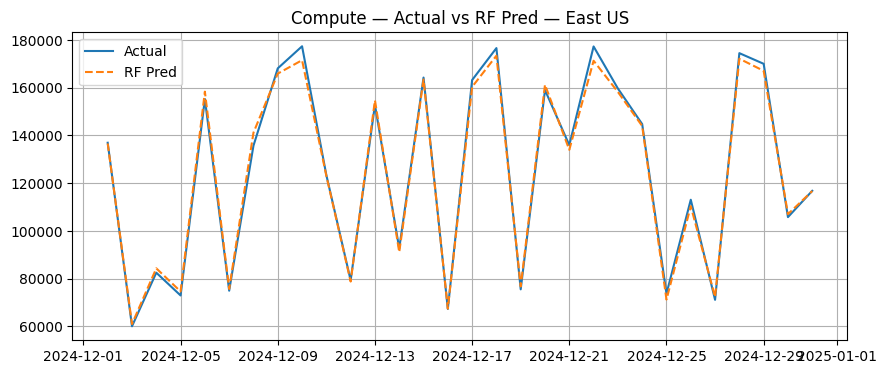

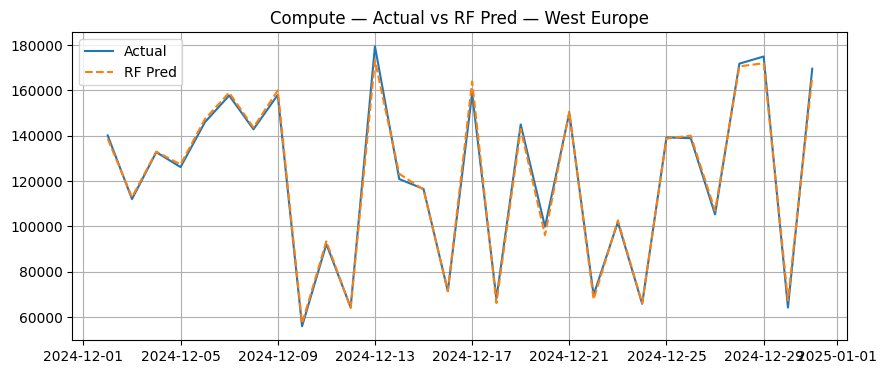

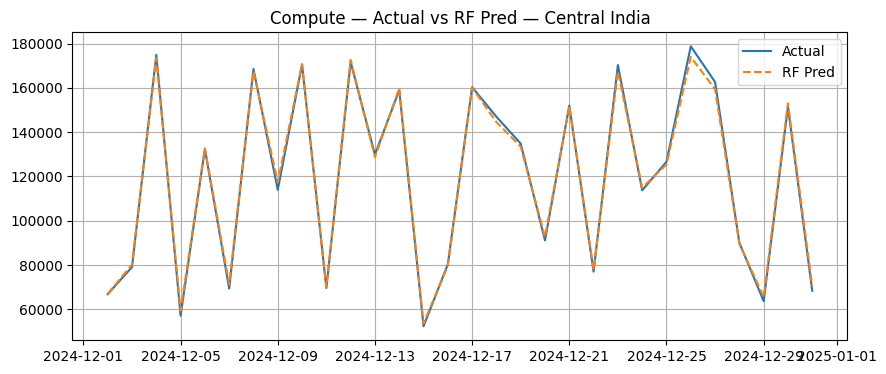

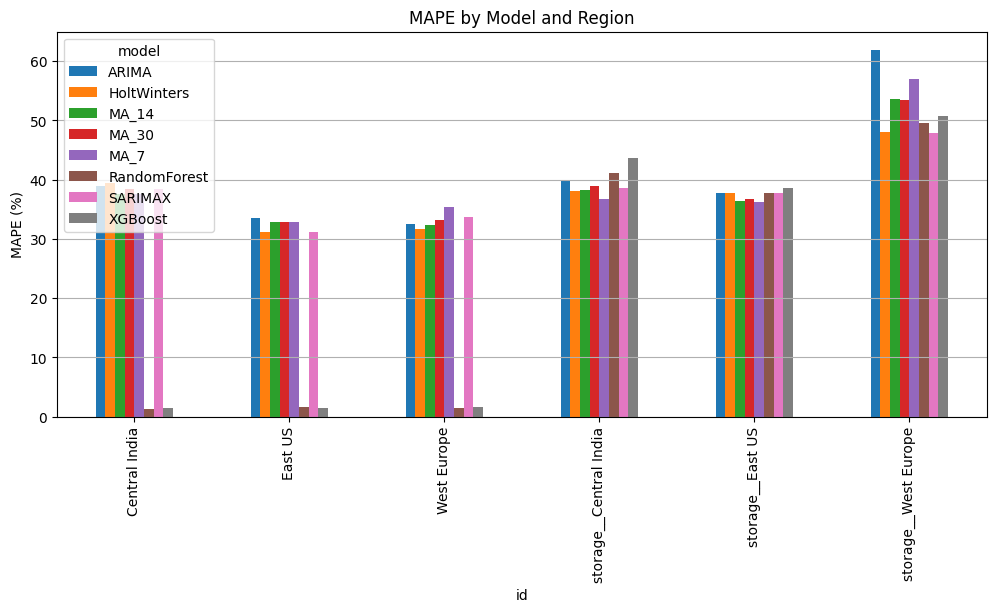

In [0]:
# ---------------------------
# Cell 16 — Visualizations (small set)
# ---------------------------
# Plot Actual vs RF predicted (test) for each compute region if available
for region in COMPUTE_REGIONS:
    if region in rf_results and region in compute_data:
        y_test = compute_data[region]["test"]
        y_pred = rf_results[region]["forecast"]
        if len(y_test)>0 and len(y_pred)>0:
            plt.figure(figsize=(10,4))
            plt.plot(y_test.index, y_test.values, label="Actual")
            plt.plot(y_pred.index, y_pred.values, label="RF Pred", linestyle="--")
            plt.title(f"Compute — Actual vs RF Pred — {region}")
            plt.legend()
            plt.grid(True)
            plt.show()

# Simple model comparison bar of MAPE
if not comparison_df.empty:
    pivot = comparison_df.pivot(index="id", columns="model", values="MAPE")
    pivot.plot(kind="bar", figsize=(12,5))
    plt.title("MAPE by Model and Region")
    plt.ylabel("MAPE (%)")
    plt.grid(axis='y')
    plt.show()
# ---------------------------


In [0]:
# ---------------------------
# Cell 17 — Summary + locations
# ---------------------------
print("=== JOB COMPLETE ===")
print("Model comparison (Delta):", f"{FORECASTS_DIR}/model_comparison_all")
print("Final 30d forecasts (Delta):", f"{FORECASTS_DIR}/final_30d_forecast")
print("Single CSV exports:", f"{FORECASTS_DIR}/export_single/")
print("Saved sklearn models under DBFS:", f"{FORECASTS_DIR}/models/")
# Optional: display the comparison table again
display(spark.read.format("delta").load(f"{FORECASTS_DIR}/model_comparison_all").limit(500))
# ---------------------------


=== JOB COMPLETE ===
Model comparison (Delta): /mnt/raw/gold/forecasts/model_comparison_all
Final 30d forecasts (Delta): /mnt/raw/gold/forecasts/final_30d_forecast
Single CSV exports: /mnt/raw/gold/forecasts/export_single/
Saved sklearn models under DBFS: /mnt/raw/gold/forecasts/models/


id,model,MAPE,RMSE,R2
East US,ARIMA,33.50735493869609,41605.224178938995,-0.070506173280525
East US,SARIMAX,31.198226330071034,42876.150919566855,-0.13690722144350098
East US,HoltWinters,31.19827078316347,41153.14307555949,-0.04736839200458709
East US,MA_7,32.90548355454335,46430.5811019779,-0.3332195746044191
East US,MA_14,32.897054200480156,45457.886373551075,-0.27794428663792625
East US,MA_30,32.91198221005981,47225.37663357841,-0.3792541635287421
East US,RandomForest,1.5606526957908233,2516.0071550421158,0.9960851314267567
East US,XGBoost,1.5200134057473584,2459.693355788272,0.9962584170384304
West Europe,ARIMA,32.59492825607141,38266.742714785185,-0.03093791542666602
West Europe,SARIMAX,33.7009107011642,37658.48290781966,0.0015756600043141944


In [0]:
%sql
CREATE TABLE IF NOT EXISTS final_30d_forecast
USING DELTA
LOCATION '/mnt/raw/gold/forecasts/final_30d_forecast';


In [0]:
%sql
CREATE TABLE IF NOT EXISTS model_comparison_all
USING DELTA
LOCATION '/mnt/raw/gold/forecasts/model_comparison_all';
